In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
random.seed(6202)

Populating the interactive namespace from numpy and matplotlib


# Counting the number of protein molecules
Let $M(t)$ be the number of protein molecules with $k$ the rate of protein production and $\gamma$ the protein degradation rate. Then the number of protein molecules is given by a two state Markov process.
$$
(M-1)
{{k \atop\longrightarrow}\atop {\longleftarrow \atop  \gamma  }}
(M)
$$

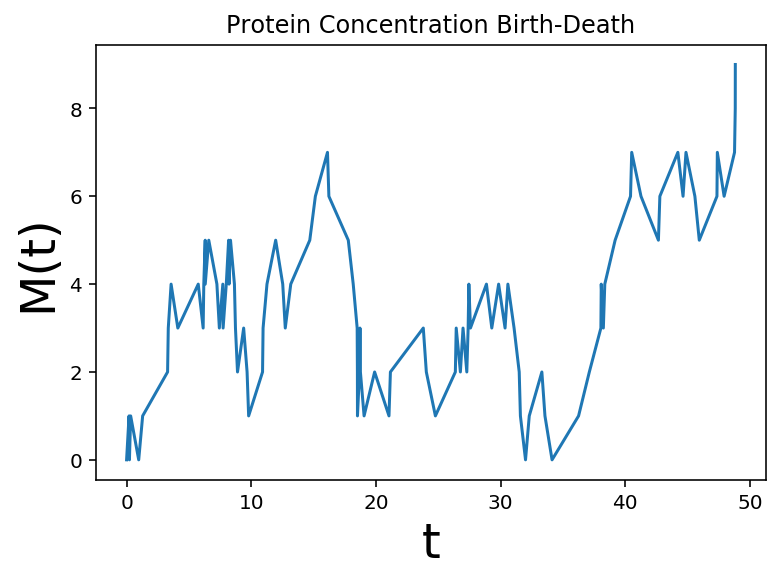

In [34]:
k = 1
gamma = 1
x0 = 0
Nsteps = 1000
X = zeros(Nsteps)
X[0] = x0
T = zeros(Nsteps)
T[0] = 0
for j in arange(1, Nsteps):
    u = rand(1)[0]
    if X[j-1] == 0:
        tau = -log(u)/(k)
        T[j] = T[j-1] + tau
        X[j] = X[j-1] + 1
    else:
        tau = -log(u)/(k+gamma)
        v = rand(1)[0]
        if v>gamma/(k+gamma):
            X[j]=X[j-1]+1 
        else:
            X[j]=X[j-1]-1
        T[j] = T[j-1] + tau


    
plot(T[:100], X[:100])
title("Protein Concentration Birth-Death")
xlabel('t', fontsize=24)
ylabel("M(t)", fontsize = 24);

# Stochastic gene expression model with high and low states

$$
{\text{low} \atop (N=0.5)}
\quad
{{\alpha/\epsilon \atop\longrightarrow}\atop {\longleftarrow \atop  \beta/\epsilon}}
\quad
{\text{high} \atop (N=1)}\quad
$$
where $x$ and $y$ satisfy the ODEs
$$
\dot{x} = \gamma N(t) - \delta x
$$
The solution to the above linear ODE is
$$
x(t) = x_0 e^{-\delta(t - t_0)} + \frac{\gamma N(t)}{\delta}\left(1 -  e^{-\delta(t - t_0)}\right).
$$

In [2]:
def gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    X = zeros(Nsteps)
    X[0] = x0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        u = rand(1)[0]
        rate = beta/eps if N[j-1]==high else alpha/eps
        tau = -log(u)/rate
        T[j] = T[j-1] + tau
        N[j] = low if N[j-1]==1 else high
        ## update x using the exact solution above
        X[j] = X[j-1]*exp(-delta*tau) + gamma*N[j-1]/delta*(1 - exp(-delta*tau)) 
    return [T, X];

In the limit $\epsilon \to 0^+$, the stochastic process converges to the ODE
$$\dot{x}_{\infty} = E[ N ] \gamma - \delta x_{\infty}, \quad x_{\infty}(0) = x_0,$$
The process $\{N(t):t>0\}$ is a two state Markov process with transition rates $\alpha / \epsilon$ from low to high and $\beta / \epsilon$ from high to low. We have that $$\lim_{t\to\infty}P[N(t)=1] = \frac{\alpha}{\alpha+\beta} + \frac{\beta}{2(\alpha+\beta)}$$
Using the fact $P(N(t)\neq1)=1-P(N(t)=1)$. So we conclude, 
$$
E [N] = \frac{\alpha}{\alpha+\beta} + \frac{\beta}{2(\alpha+\beta)}.$$
The exact solution to the previous ODE in the case $\epsilon \rightarrow 0$ becomes
$$
x_{\infty}(t) = x_0 e^{-\delta t} + \frac{\gamma E [N]}{\delta}\left(1 -  e^{-\delta t}\right).
$$
Further, we have that 
$$ \lim_{t\rightarrow\infty}x(t) = \frac{\gamma E[N]}{\delta}$$

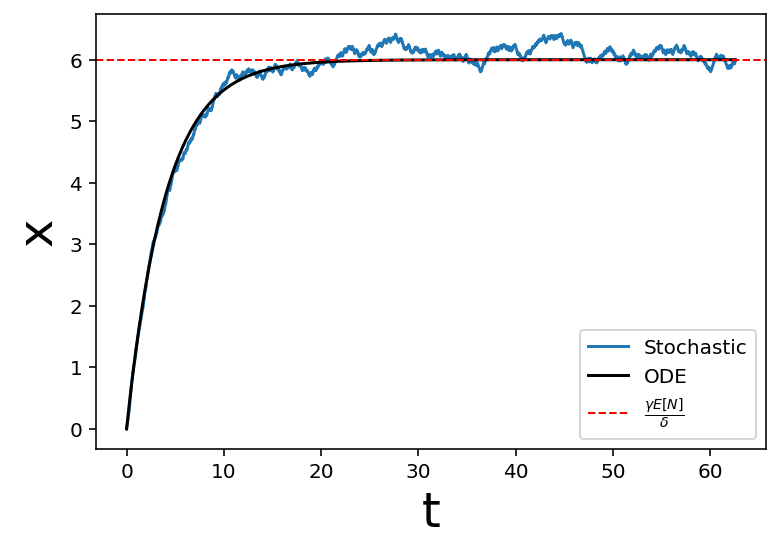

In [36]:
eps = 0.05
gamma = 2.
delta = 0.25
alpha = 1.
beta = 1.
high = 1
low = 0.5
n0 = high
x0 = 0
Nsteps = 1250
M1 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)

Tinf = linspace(0, M1[0][-1], 200)
Navg = alpha/(alpha + beta)*high + beta/(alpha+beta)*low
Xinf = x0*exp(-delta*Tinf) + gamma*Navg/delta*(1 - exp(-delta*Tinf))
    
plot(M1[0], M1[1],label="Stochastic")
plot(Tinf, Xinf, 'k',label="ODE")
axhline(gamma*Navg/delta, xmin=0, xmax=60,color='red',linewidth=1.0,linestyle='--',
        label=r'$\frac{\gamma E[N]}{\delta}$' )
xlabel('t', fontsize=24)
ylabel('x', fontsize=24);
legend()

## Interpreting the parameters of our model
There are three primary aspects of the model to consider.
1. The relationship between $\alpha$ and $\beta$ 
2. The effect of $\gamma$ and $\delta$

First to evaluate the effect of $\alpha$ and $\gamma$, the restriction $\alpha+\gamma=2$ was introduced and then four cases were considered.
* $\alpha=\gamma=1$
* $\alpha=1.5$,$\beta=0.5$
* $\alpha=1.25$,$\beta=0.75$
* $\alpha=0.5$,$\beta=1.5$

Text(0, 0.5, 'M(t)')

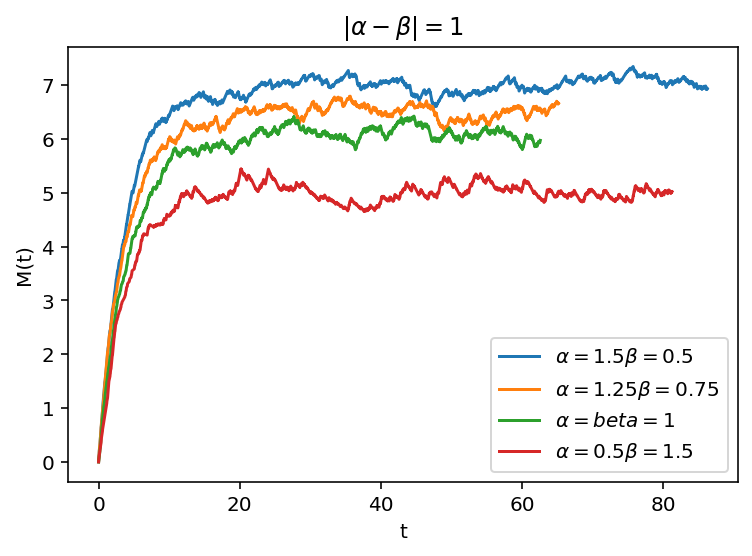

In [37]:
alpha = 1.5
beta = 0.5
M2 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
alpha = 1.25
beta = 0.75
M3 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
alpha = 0.5
beta = 1.5
M4 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)

plot(M2[0], M2[1],label=r'$\alpha=1.5 \beta=0.5$')
plot(M3[0], M3[1],label=r'$\alpha=1.25 \beta=0.75$')
plot(M1[0], M1[1],label=r'$\alpha=beta=1$')
plot(M4[0], M4[1],label=r'$\alpha=0.5 \beta=1.5$')
title(r"$\left|\alpha-\beta\right|=1$")
legend()
xlabel("t")
ylabel("M(t)")

So it is clear that $\alpha-\beta$ scales the graph either away or towards the x-axis depending on $sgn(\alpha-\beta)$, further we see that the magnitude of the shift is proportional to $\left|\alpha-\beta\right|$.

Next, the effect of $\gamma$ and $\delta$ were examined by choosing some sample values. Since we are, in general, interested in long term behavior we notice that its the difference $\gamma-\delta$ that is important, but rather the ratio $\gamma/\delta$. This fact is shown in the graph below.

Text(0, 0.5, 'M(t)')

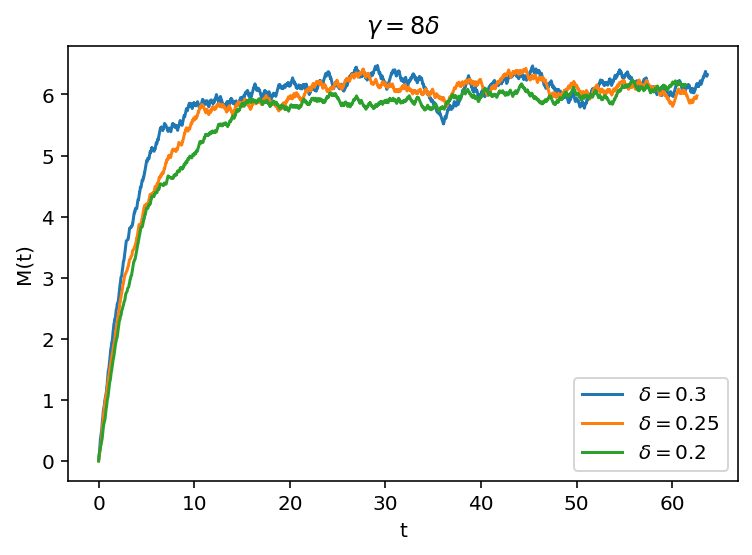

In [38]:
alpha = 1
beta = 1
delta = 0.3
gamma = 8*delta
M2 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
delta = 0.2
gamma = 8*delta
M3 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)


plot(M2[0], M2[1],label=r'$\delta=0.3$')
plot(M1[0], M1[1],label=r'$\delta=0.25$')
plot(M3[0], M3[1],label=r'$\delta=0.2$')
title(r"$\gamma=8\delta$")
legend()
xlabel("t")
ylabel("M(t)")

Thus different samples of ratios $\gamma/\delta$ were chosen.

Text(0, 0.5, 'M(t)')

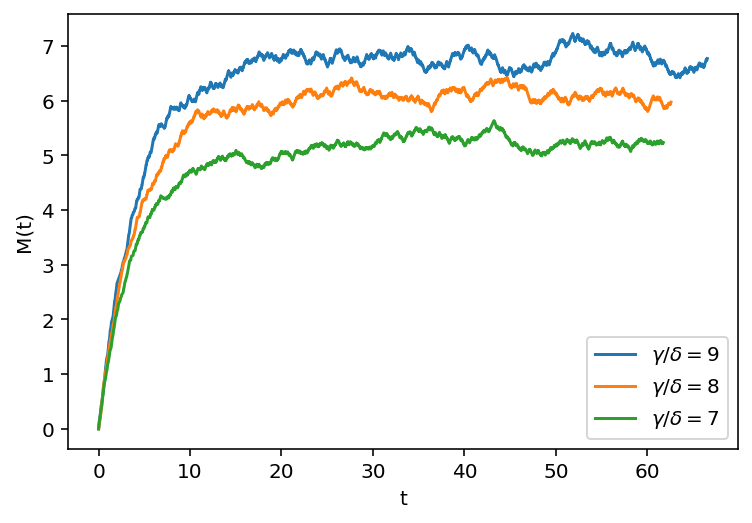

In [39]:
delta = 0.25
gamma = 2.25
M2 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
gamma = 1.75
M3 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)

plot(M2[0], M2[1],label=r'$\gamma/\delta=9$')
plot(M1[0], M1[1],label=r'$\gamma/\delta=8$')
plot(M3[0], M3[1],label=r'$\gamma/\delta=7$')
legend()
xlabel("t")
ylabel("M(t)")

Again we see a similar relationship between the ratio $\gamma/\delta$ as there was for the difference $\alpha-\beta$. Mathematically, the two relationships are equivalent. However, biologically they give rise to different scenarios. The rates $\alpha$ and $\beta$ determine how long the system spends in a high or low production state. Where as the parameters $\gamma$ and $\delta$ determine how the system behaves when it is in either state. This is a key distinction, as the system may regulate the time spent in a state very differently than it would regulate the speed at which a gene is expressed. This could be a possible shortcoming of our model.

# Asymptotic Results
We are interested in the asymptotic properties of our stochastic model, and more importantly, how these properties compare to to the solution of our ODE. We examine the two cases:
1. $Nsteps \rightarrow \infty$
2. $\epsilon \rightarrow 0$

First we consider results for large Nsteps. To evaluate the relationship between the ODE and stochastic model the residuals between the two models were obtained.

Text(0.5, 1.0, 'Histogram of residuals')

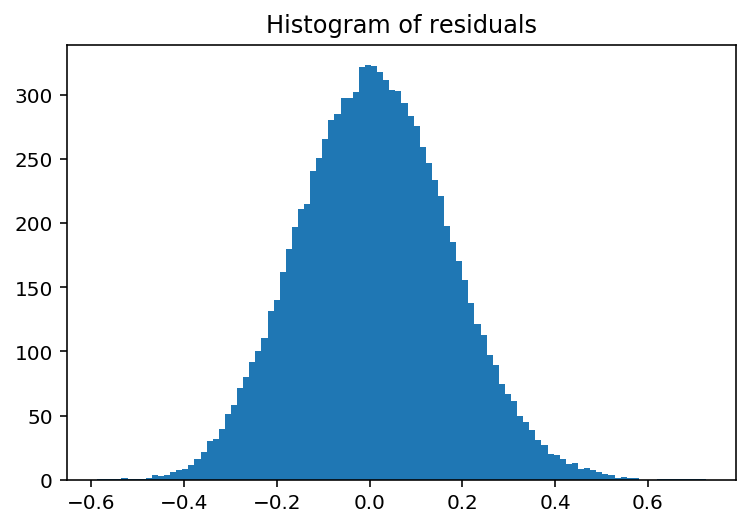

In [40]:
def gene_ode(x0,delta,T,gamma,Navg):
    return(x0*exp(-delta*T) + gamma*Navg/delta*(1 - exp(-delta*T)))

eps = 0.05
gamma = 2.
delta = 0.25
alpha = 1.
beta = 1.
high = 1
low = 0.5
n0 = high
x0 = 0
Nsteps = 200000
M = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
Navg = alpha/(alpha + beta)*high + beta/(alpha+beta)*low
R = zeros(len(M[0]))
for i in range(len(M[0])):
    R[i] = M[1][i]-gene_ode(x0,delta,M[0][i],gamma,Navg)

    
hist(R[1:], bins=100, weights=diff(M[0]))
title("Histogram of residuals")

In [41]:
def gene_20(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    X = zeros(Nsteps)
    X[0] = x0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        u = rand(1)[0]
        rate = beta/eps if N[j-1]==high else alpha/eps
        tau = -log(u)/rate
        T[j] = T[j-1] + tau
        if T[j] >20:
            time = 20-T[j-1]
            X[-1] = X[j-1]*exp(-delta*time) + gamma*N[j-1]/delta*(1 - exp(-delta*time))
            break
        N[j] = low if N[j-1]==1 else high
        ## update x using the exact solution above
        X[j] = X[j-1]*exp(-delta*tau) + gamma*N[j-1]/delta*(1 - exp(-delta*tau)) 
    return X[-1];

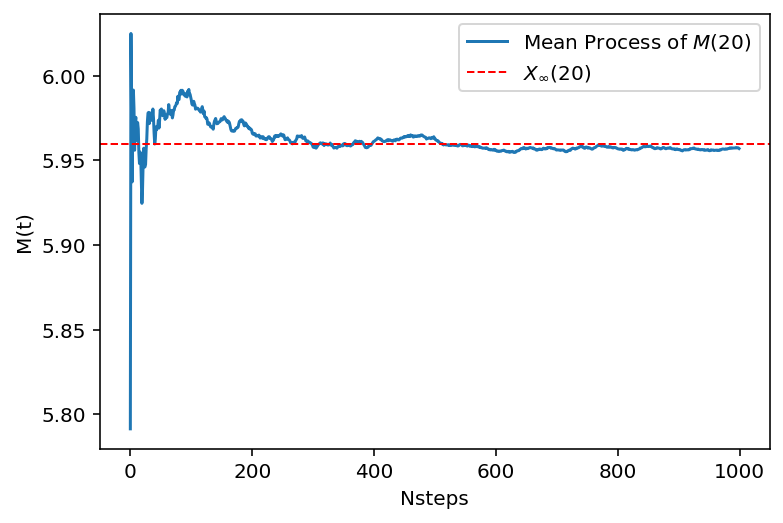

In [42]:
eps = 0.05
gamma = 2.
delta = 0.25
alpha = 1.
beta = 1.
high = 1
low = 0.5
n0 = high
x0 = 0
Nsteps = 1000
samples = zeros(1000)
for i in range(1000):
    samples[i] = gene_20(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
sequence = cumsum(samples)
mean_process = zeros(1000)
for i in range(1000):
    mean_process[i] = sequence[i]/(i+1)
Navg = alpha/(alpha + beta)*high + beta/(alpha+beta)*low
    
plot(range(1000),mean_process, label=r"Mean Process of $M(20)$")
axhline(y=gene_ode(x0,delta,20,gamma,Navg), xmin=0, xmax=1000,color='red',linewidth=1.0,linestyle='--' ,label=r"$X_\infty(20)$")
ylabel("M(t)")
xlabel("Nsteps")
title("")
legend()

We note that the residuals appear to be normally distributed with mean 0. This suggests that if $M(t)_i$ is the $i^{th}$ sample of the number of protein molecules at time $t$ then for the mean process $(\sum_{i=0}^{n}\frac{M(t)_i}{i},n=1,2,3...)$ we have that as $n\rightarrow\infty$, 
$$\sum_{i=0}^{n}\frac{M(t)_i}{i} \longrightarrow x_\infty(t)$$ where $x_\infty(t)$ is the asymptotic ODE solution. So by the law of large numbers we deduce 
$$E[M_t] = x_\infty(t)$$.

In [43]:
means = zeros(50000) 
varian = zeros(50000)

for i in range(1,len(means)):
    means[i]=mean(M[1][0:i+1])-gene_ode(x0,delta,M[0][i],gamma,Navg)
    varian[i] = var(means[0:i+1])
    

Text(0.5, 0, 'Nsteps')

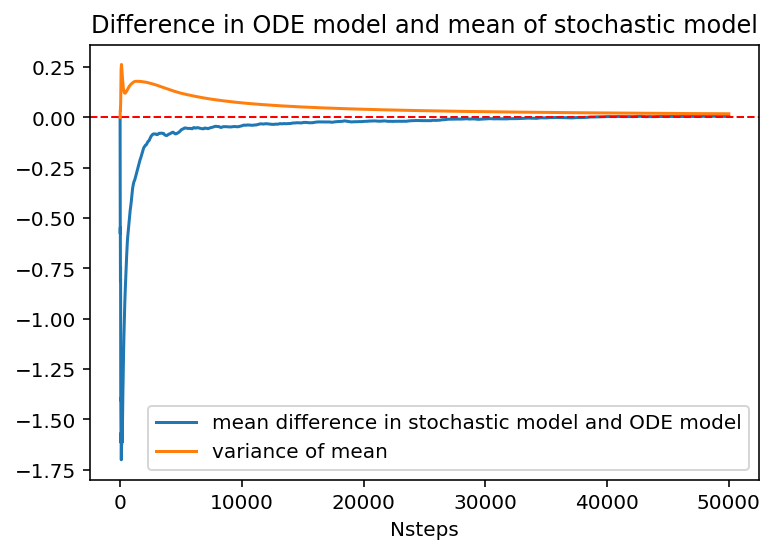

In [44]:
plot(range(len(means)),means,label="mean difference in stochastic model and ODE model")
plot(range(len(varian)),varian,label="variance of mean")
legend()
axhline(y=0, xmin=0, xmax=len(R),color='red',linewidth=1.0,linestyle='--' )
title("Difference in ODE model and mean of stochastic model")
xlabel("Nsteps")

A key result is that as $\epsilon \rightarrow 0$ then the total time spent in the high state approaches $\frac{\alpha}{\alpha+\beta}$. This results actually also holds for $Nsteps \rightarrow \infty$.

Text(0.5, 0, 'Nsteps')

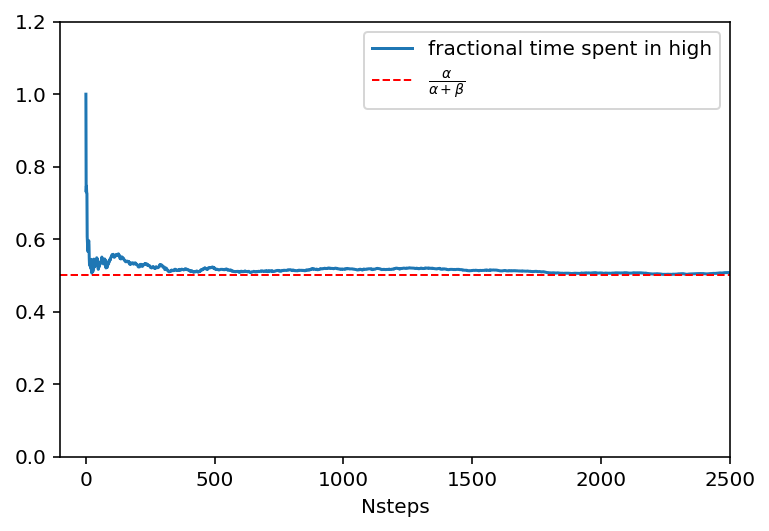

In [45]:
difftimes = diff(M[0])
timehigh = [difftimes[2*i] for i in range(5000)]
timehighs = cumsum(timehigh)
tottimes = [M[0][2*i+1] for i in range(len(timehigh))]
frachigh = divide(timehighs,tottimes)
plot(range(len(timehigh)),frachigh,label = 'fractional time spent in high')
axes = plt.gca()
axes.set_xlim([-100,2500])
axes.set_ylim([0,1.2])
axhline(y=alpha/(alpha+beta), xmin=0, xmax=len(R),color='red',linewidth=1.0,linestyle='--',
        label=r'$\frac{\alpha}{\alpha+\beta}$' )
legend()
xlabel("Nsteps")

So we see a close relationship between the two limits 
$$Nsteps \rightarrow \infty$$ and
$$\epsilon \rightarrow 0.$$
However a key feature in the parameter $\epsilon$ that cannot be captured by $Nsteps$ is that as $\epsilon \rightarrow 0$ we have that $Var(R)\rightarrow0$ where $R$ is the residual between the stochastic model and ODE.

In [46]:
varians = zeros(50000)

for i in range(1,len(varians)):
    varians[i] = var(R[0:i+1])

Text(0.5, 0, 'Nsteps')

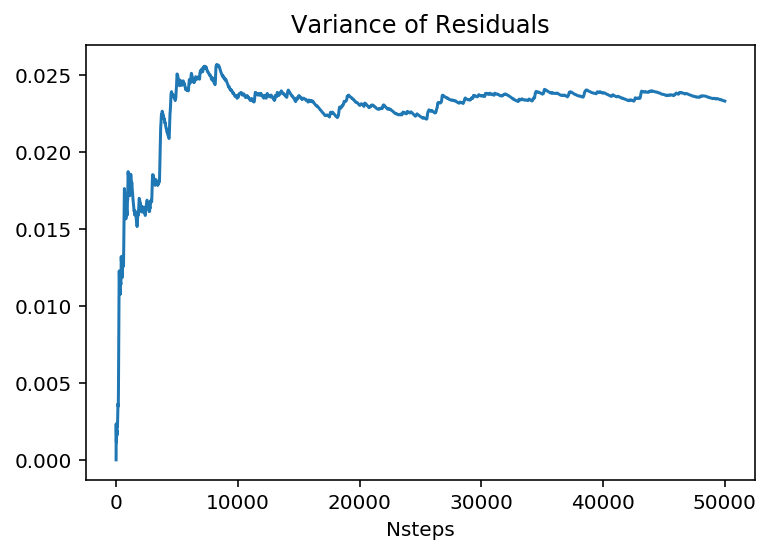

In [47]:
plot(range(len(varians)),varians)
title("Variance of Residuals")
xlabel("Nsteps")

Thus to correctly model the noise estimated from the expression levels of some gene, one needs to select a suitable $\epsilon$.

Text(0, 0.5, 'M(t)')

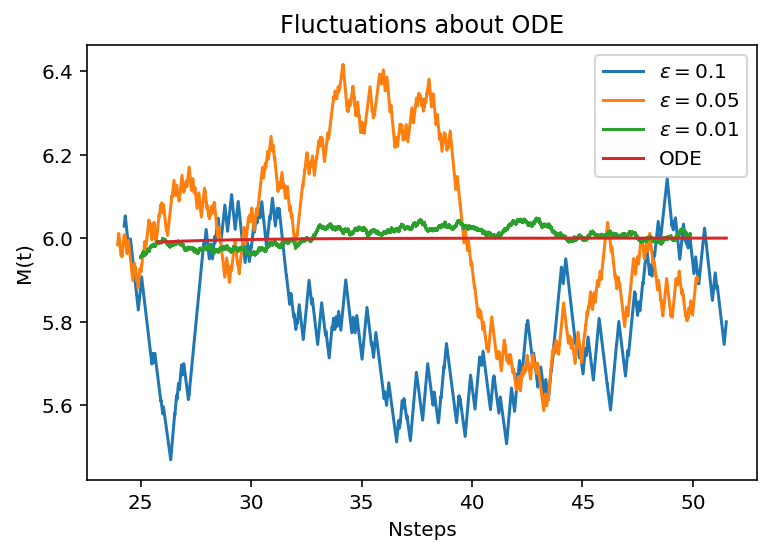

In [48]:
gamma = 2.
delta = 0.25
alpha = 1.
beta = 1.
high = 1
low = 0.5
n0 = high
x0 = 0
Nsteps = 500
M1 = gene_express(0.1,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
M2 = gene_express(0.05,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps*2)
M3 = gene_express(0.001,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps*100)
maxtime = max(M1[0][-1],M2[0][-1],M3[0][-1])
Tinf = linspace(maxtime/2, maxtime, 200)
Navg = alpha/(alpha + beta)*high + beta/(alpha+beta)*low
Xinf = x0*exp(-delta*Tinf) + gamma*Navg/delta*(1 - exp(-delta*Tinf))
plot(M1[0][int(Nsteps/2):], M1[1][int(Nsteps/2):],label=r'$\epsilon=0.1$')
plot(M2[0][int(Nsteps):], M2[1][int(Nsteps):],label=r'$\epsilon=0.05$')
plot(M3[0][int(Nsteps*50):], M3[1][int(Nsteps*50):],label=r'$\epsilon=0.01$')
plot(Tinf,Xinf,label='ODE')
title("Fluctuations about ODE")
legend()
xlabel("Nsteps")
ylabel("M(t)")

# Interpretation of Results
Due to the chaotic nature of biological functions it may be hard to capture the true dynamics of how a gene is expressed. Some consider that the transcription and translation involved in protein synthesis is itself a random process (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3118044/). As such this paper aimed to model the dynamics of a hypothetical gene being expressed with simple feedback regulation. More specifically the models primary intent was to display the effects on the output of protein as a gene was being randomly switched from an active and inactive state as seen in some datasets (https://www.ncbi.nlm.nih.gov/pubmed/16360033). This was done by considering 'high' and 'low' protein production states where the rate of protein concentration increase was given by a simple linear differential equation. Consequently, we were able to show that after an initial 'burn-in' period protein concentration trended toward an equilibrium given by the differential equation. Parameters of the model were then examined and it was noted that specific pairs of parameters were mathematically equivalent to one another and differed only in biological interpretation. Specifically, the model suggests that the difference $\alpha-\beta$ when compared to the ratio $\gamma/\delta$ had the same effects on long term behaviour. As such if one were to change only one of these (either the difference or the ratio) and present it to someone unknowing, they would be unable to determine which exactly was changed. Lastly asymptotic results were achieved. First, the case $t\rightarrow\infty$ was examined. These results were compared to the case when $\epsilon\rightarrow0$, that is, the case when switching between 'high' and 'low' production states happened instantaneously. Once again, it is noted that these parameters have similar effects on asymptotic behaviour of the system with the key differentiation that, as time reaches its limit, it was only the averages of protein concentration that approached the solution of the differential equation. Compared to the limit with $\epsilon$, in which the stochastic model approached the differential equation solution everywhere. Further, $\epsilon$ was used to capture the inherent variability present in the hypothetical gene.

In [82]:
def gene_express2(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    X = zeros(Nsteps)
    X[0] = x0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        u = rand(1)[0]
        rate = beta*eps if N[j-1]==high else (X[j-1]*eps)**2
        tau = -log(u)/rate
        T[j] = T[j-1] + tau
        N[j] = low if N[j-1]==1 else high
        ## update x using the exact solution above
        X[j] = X[j-1]*exp(-delta*tau) + gamma*N[j-1]/delta*(1 - exp(-delta*tau)) 
    return [T, X];

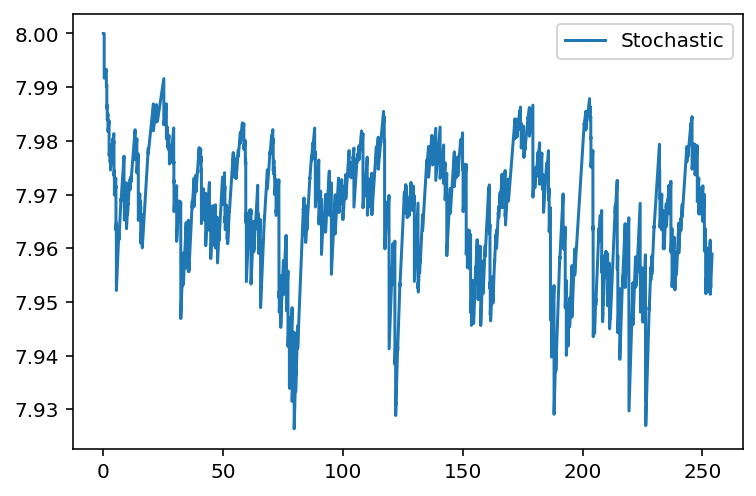

In [92]:
eps = 2
gamma = 2.
delta = 0.25
alpha = 1.
beta = 1.
high = 1
low = 0.5
n0 = high
x0 = 8
Nsteps = 1000
M1 = gene_express2(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
M2 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
Tinf = linspace(0, M1[0][-1], 200)
Navg = alpha/(alpha + beta)*high + beta/(alpha+beta)*low
Xinf = x0*exp(-delta*Tinf) + gamma*Navg/delta*(1 - exp(-delta*Tinf))
#plot(M2[0], M2[1],label="Stoch")    
plot(M1[0], M1[1],label="Stochastic")

legend()